In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To load dataset kaggle_diabetes
df=pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
#to see null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

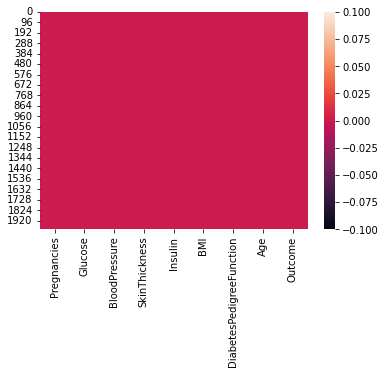

In [4]:
#to see null values visually
sb.heatmap(df.isnull())
plt.show()

In [5]:
#to see datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
#to see no of rows and columns
df.shape

(2000, 9)

In [7]:
#to see duplicates
df.duplicated().sum()

1256

In [8]:
#to remove duplicte entries
df.drop_duplicates(inplace=True)
df.shape

(744, 9)

In [9]:
#to see data is balanced or not
df['Outcome'].unique(),df['Outcome'].value_counts()

(array([1, 0], dtype=int64),
 0    491
 1    253
 Name: Outcome, dtype: int64)

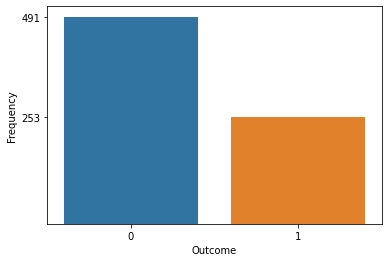

In [10]:
#to see this visually using countplot
sb.countplot(data=df,x='Outcome')
f=df['Outcome'].value_counts()
plt.yticks(f)
plt.ylabel('Frequency')
plt.show()

In [11]:
#we can see that data is balanced

In [12]:
#to select input and output
X=df.drop('Outcome',axis=1) #input selection
Y=df['Outcome'] #output selection

In [13]:
#to see input selected properly or not
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [14]:
#to apply train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.3)

In [15]:
#to see the distribution of data for training and testing
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((520, 8), (224, 8), (520,), (224,))

In [16]:
#to apply StandardScaler
from sklearn.preprocessing import StandardScaler
#to create an object
ss=StandardScaler()
#to apply
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [17]:
#to see whether Standard Scaling worked or not
X_train,X_test

(array([[ 1.62628812,  0.7466635 ,  0.96705091, ..., -0.23202162,
          0.92304681,  1.76483205],
        [-0.80118177, -1.56480967,  0.47297892, ...,  0.13489176,
         -0.15383619, -1.03654211],
        [ 1.32285439,  0.15317715,  0.96705091, ...,  0.8054576 ,
         -0.37908679,  1.41466028],
        ...,
        [ 2.84002307,  0.15317715,  1.06586531, ...,  1.4254147 ,
          0.34294938,  0.80185968],
        [ 0.10911944,  1.55880273,  0.17653572, ...,  1.45071907,
          0.02204441, -0.5988274 ],
        [ 1.62628812, -0.59648983,  0.37416452, ...,  0.09693521,
          0.5959706 ,  1.15203145]]),
 array([[ 0.10911944,  2.12105296,  2.05400929, ..., -0.45976096,
          0.64225497,  0.36414497],
        [ 0.10911944,  1.15273311,  0.47297892, ...,  0.09693521,
          1.0217868 , -0.16111268],
        [-0.1943143 , -1.15874006,  0.17653572, ...,  0.64097919,
         -0.63210801, -0.42374151],
        ...,
        [ 0.41255318,  0.46553839,  0.67060771, ..., -

In [18]:
#to create confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
#create a function 
def create_model(model): #model is user defined which holds the object of algo
    #train the model
    model.fit(X_train,Y_train)
    #test the data
    Y_pred=model.predict(X_test)
    #Generate report
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    return model

# Logistic Regression

In [20]:
#to apply LogisticRegression 
from sklearn.linear_model import LogisticRegression
#create an object
lr=LogisticRegression()
#call function
lr=create_model(lr)

[[134  20]
 [ 28  42]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224



# Decision Tree(Gini)

In [21]:
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method
#call function
dt=create_model(dt)

[[105  49]
 [ 34  36]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       154
           1       0.42      0.51      0.46        70

    accuracy                           0.63       224
   macro avg       0.59      0.60      0.59       224
weighted avg       0.65      0.63      0.64       224



In [22]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.302360
1,BMI,0.166217
2,DiabetesPedigreeFunction,0.165793
3,Age,0.142351
4,BloodPressure,0.077491
5,Pregnancies,0.069794
6,SkinThickness,0.045129
7,Insulin,0.030865


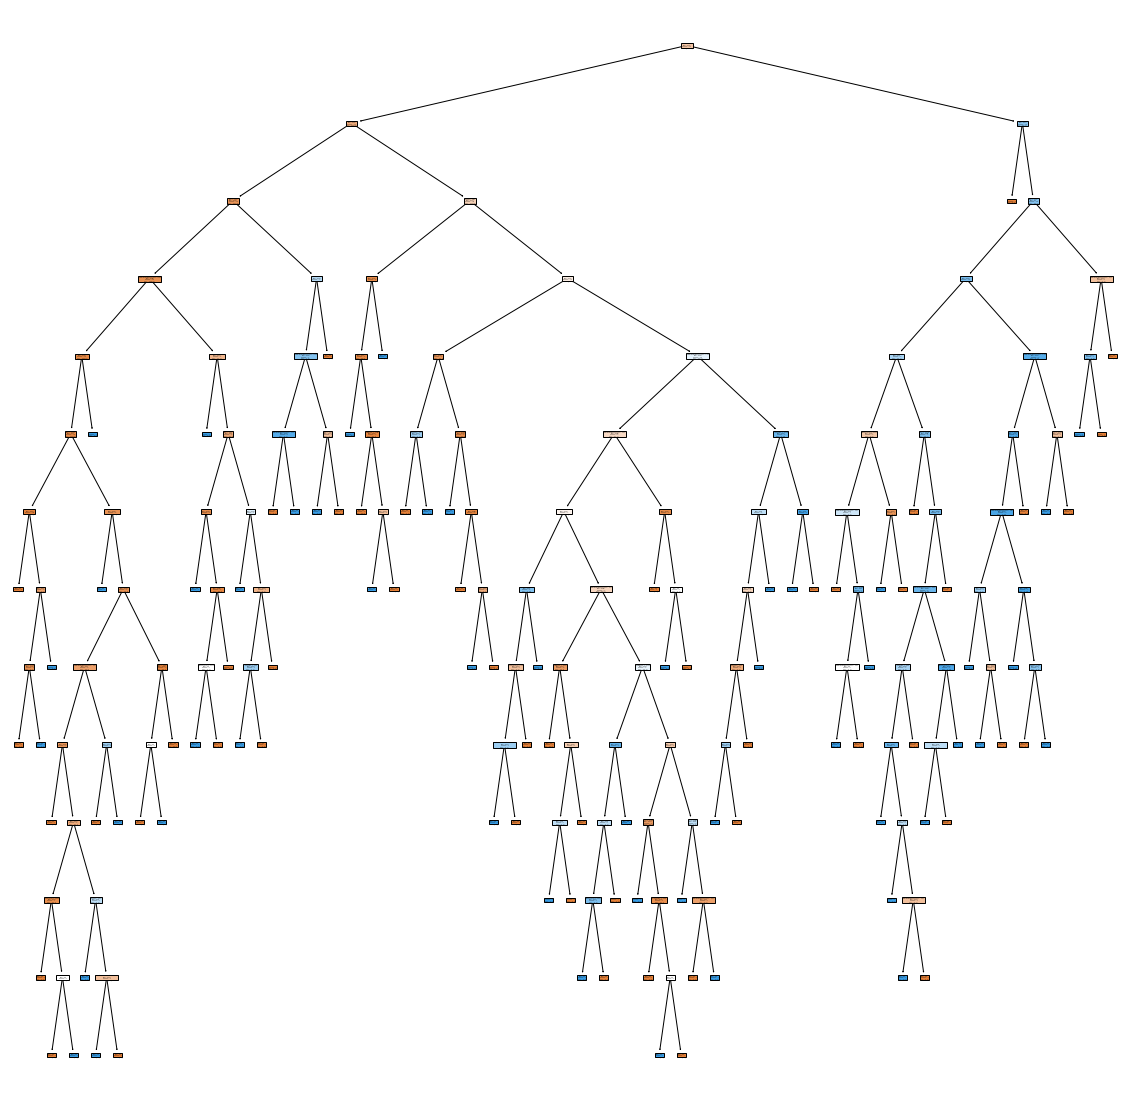

In [23]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [24]:
#to see with max_depth (pruning technique)
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)
#call function
dt1=create_model(dt1)

[[104  50]
 [ 14  56]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.76       154
           1       0.53      0.80      0.64        70

    accuracy                           0.71       224
   macro avg       0.70      0.74      0.70       224
weighted avg       0.77      0.71      0.72       224



In [25]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.565596
1,BMI,0.209823
2,Age,0.140294
3,DiabetesPedigreeFunction,0.064486
4,Insulin,0.019802
5,Pregnancies,0.000000
6,BloodPressure,0.000000
7,SkinThickness,0.000000


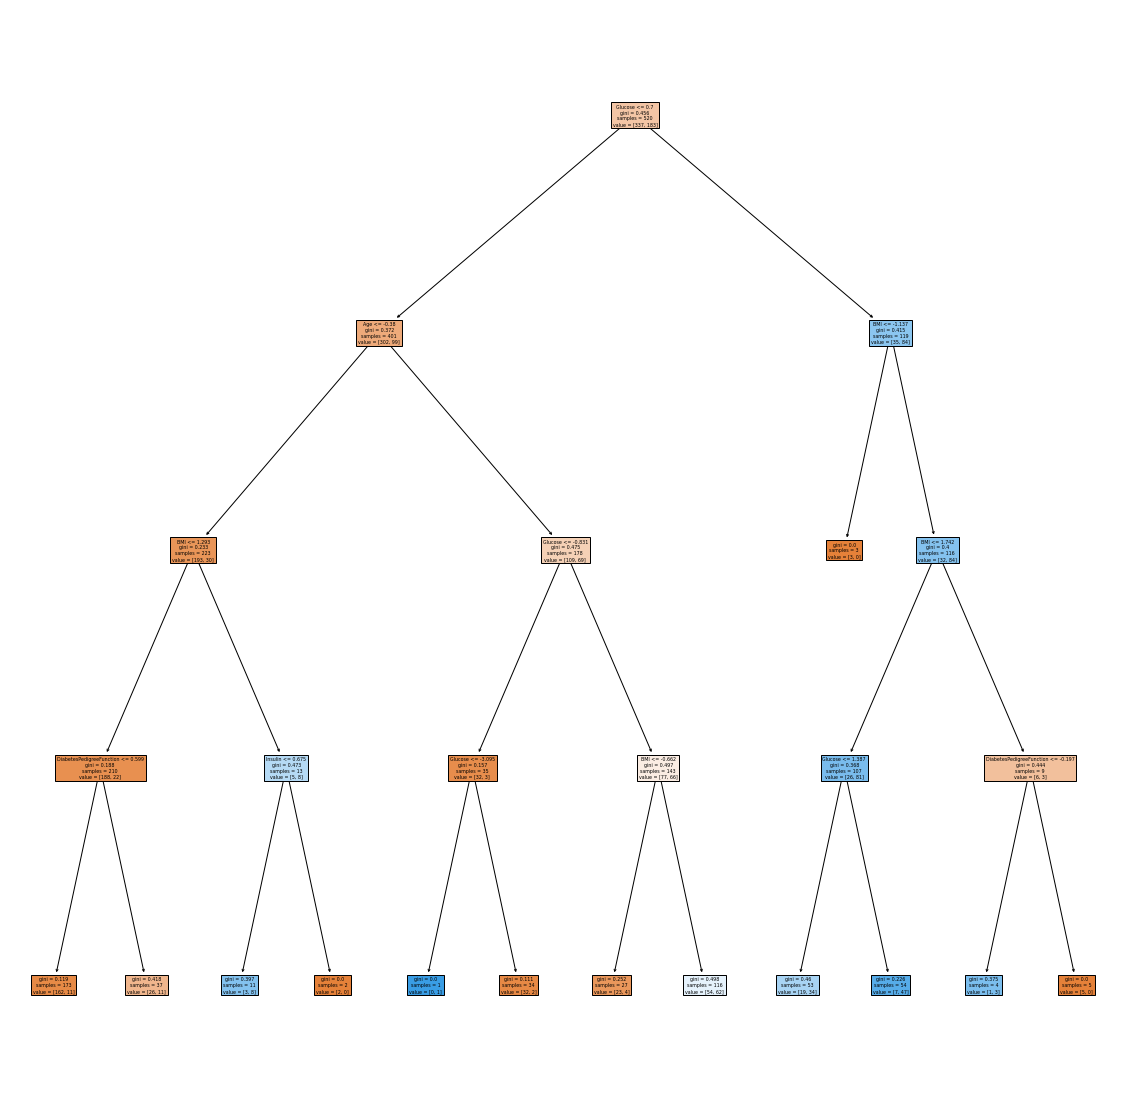

In [26]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [27]:
#to see with min_samples_leaf
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=46)
#call function
dt2=create_model(dt2)

[[120  34]
 [ 22  48]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.59      0.69      0.63        70

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.76      0.75      0.75       224



In [28]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.678041
1,Age,0.176418
2,BMI,0.133825
3,DiabetesPedigreeFunction,0.011716
4,Pregnancies,0.000000
5,BloodPressure,0.000000
6,SkinThickness,0.000000
7,Insulin,0.000000


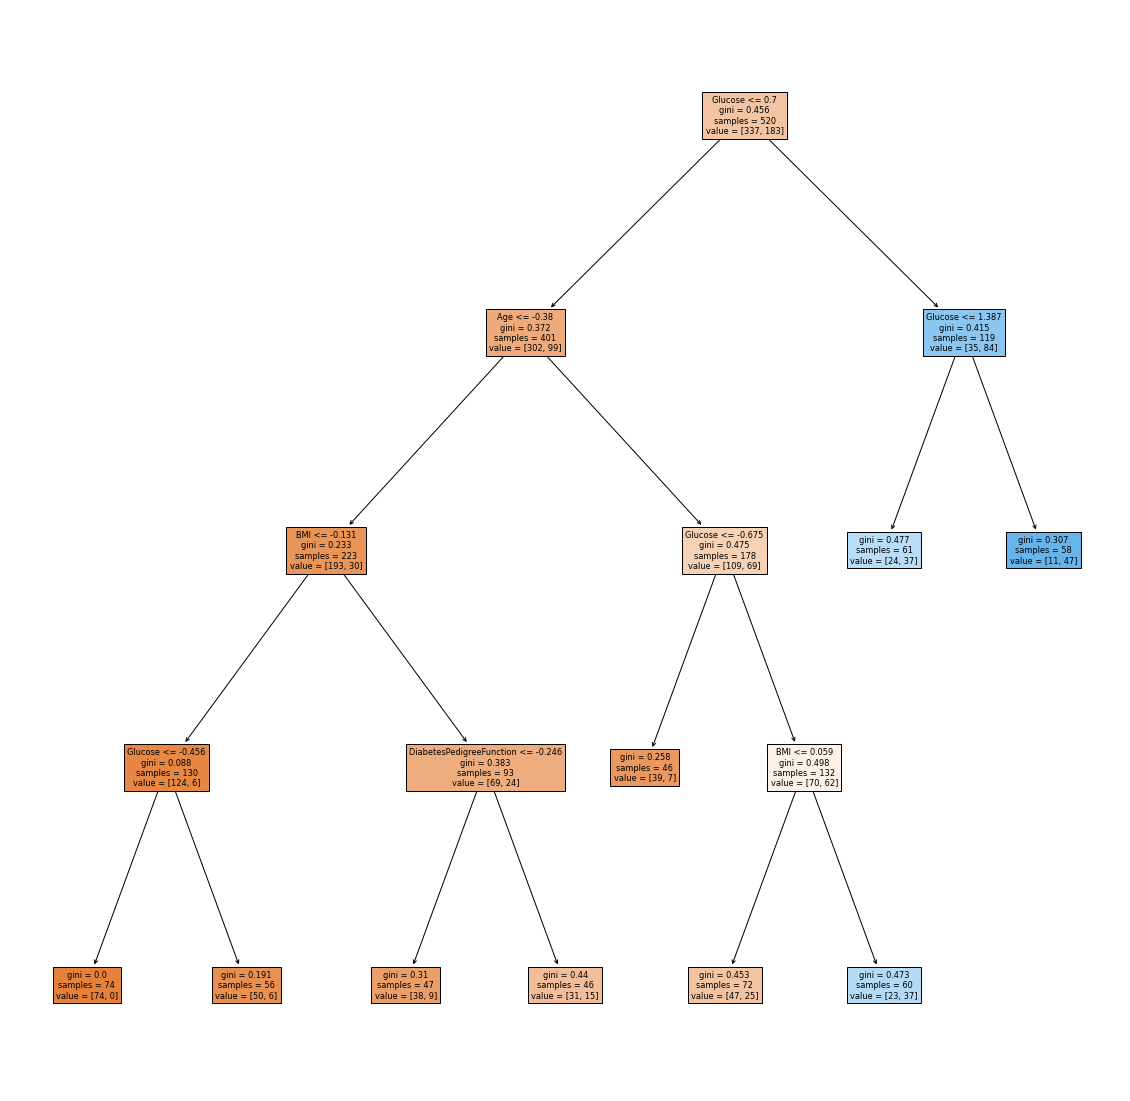

In [29]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# Decison Tree(Entropy)

In [30]:
#to create an object
dt=DecisionTreeClassifier(random_state=1,criterion='entropy') #by default gini index method
#call function
dt=create_model(dt)

[[127  27]
 [ 32  38]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.58      0.54      0.56        70

    accuracy                           0.74       224
   macro avg       0.69      0.68      0.69       224
weighted avg       0.73      0.74      0.73       224



In [31]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.236065
1,BMI,0.165551
2,Age,0.160368
3,DiabetesPedigreeFunction,0.133861
4,SkinThickness,0.127734
5,BloodPressure,0.095186
6,Pregnancies,0.041324
7,Insulin,0.039911


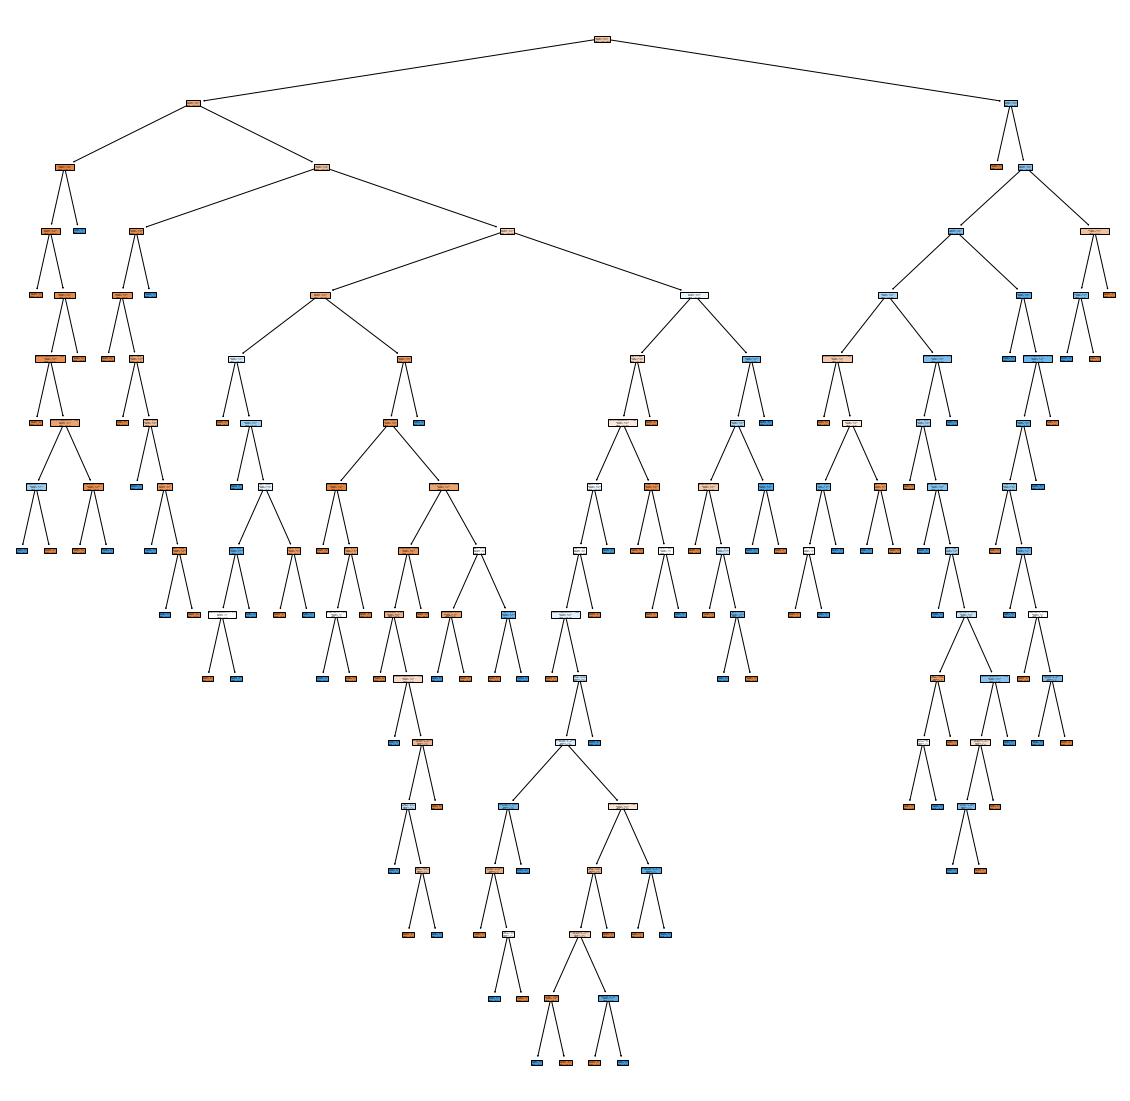

In [32]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [33]:
#apply max_depth with entropy method
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
#call function
dt1=create_model(dt1)

[[107  47]
 [ 15  55]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       154
           1       0.54      0.79      0.64        70

    accuracy                           0.72       224
   macro avg       0.71      0.74      0.71       224
weighted avg       0.77      0.72      0.73       224



In [34]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.515251
1,BMI,0.261316
2,Age,0.092256
3,Insulin,0.044242
4,DiabetesPedigreeFunction,0.031642
5,SkinThickness,0.031006
6,Pregnancies,0.024288
7,BloodPressure,0.000000


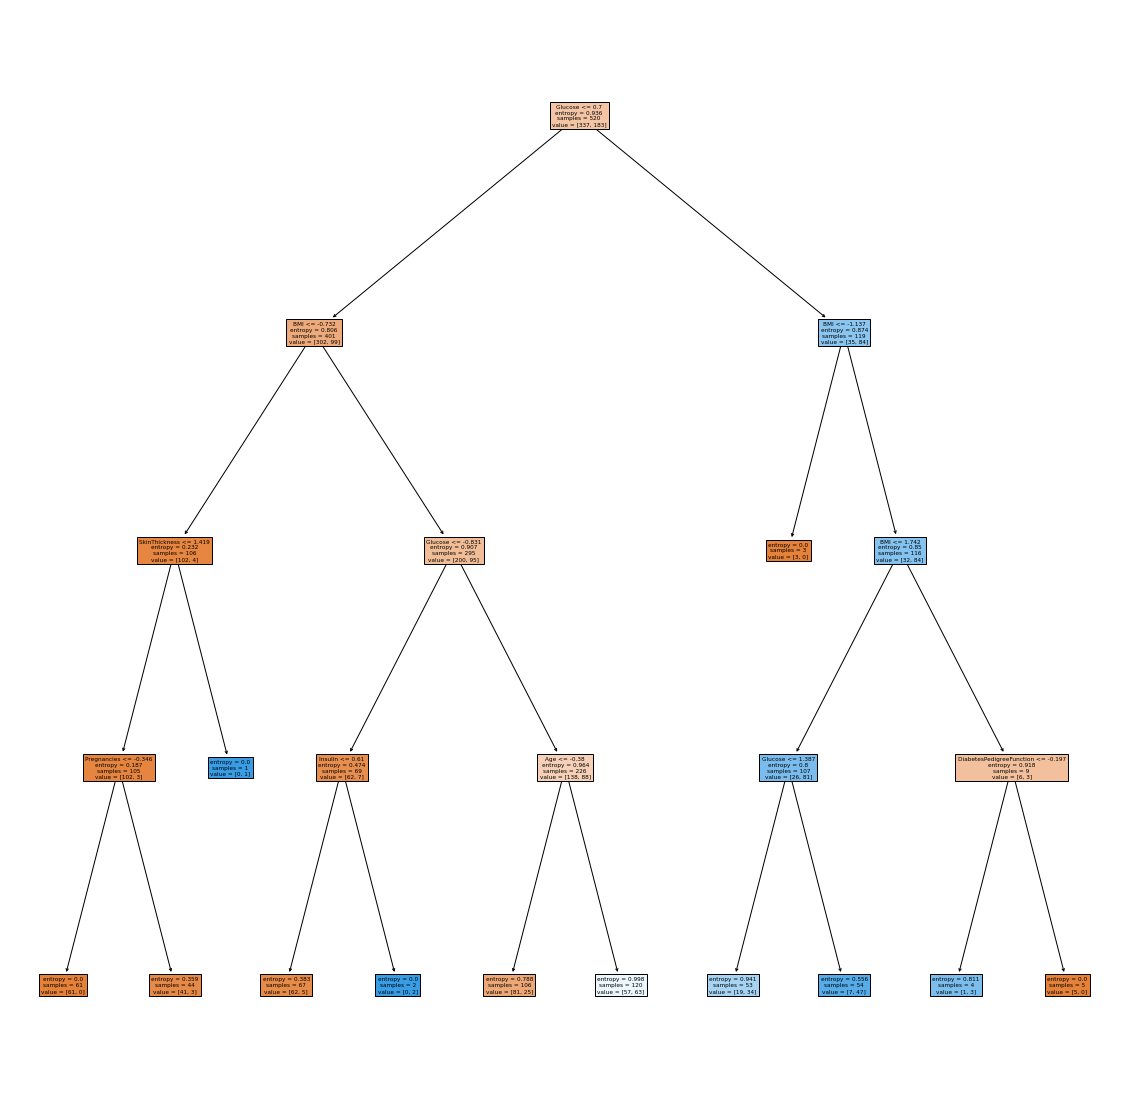

In [35]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [36]:
#now lets see with min_samples_leaf
#create object of DecisionTreeClassifier class 
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=70,criterion='entropy') 
#call function
dt2=create_model(dt2)

[[113  41]
 [ 14  56]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       154
           1       0.58      0.80      0.67        70

    accuracy                           0.75       224
   macro avg       0.73      0.77      0.74       224
weighted avg       0.79      0.75      0.76       224



In [37]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.632988
1,BMI,0.261831
2,Age,0.105181
3,Pregnancies,0.000000
4,BloodPressure,0.000000
5,SkinThickness,0.000000
6,Insulin,0.000000
7,DiabetesPedigreeFunction,0.000000


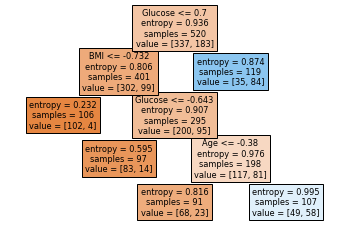

In [38]:
#create a tree
from sklearn import tree
features=X.columns
#plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# ENSEMBLING TECHNIQUE: RANDOM FOREST TREE

In [39]:
#call random forest tree from package use gini index
from sklearn.ensemble import RandomForestClassifier
#create object for RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)
#call the function
rfc=create_model(rfc)

[[131  23]
 [ 28  42]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       154
           1       0.65      0.60      0.62        70

    accuracy                           0.77       224
   macro avg       0.74      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224



In [40]:
#to see with entropy method
#create object for RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=10,max_features=4,random_state=1,criterion="entropy")
#call the function
rfc=create_model(rfc)

[[135  19]
 [ 30  40]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.68      0.57      0.62        70

    accuracy                           0.78       224
   macro avg       0.75      0.72      0.73       224
weighted avg       0.77      0.78      0.78       224



# ADA boosting

In [41]:
#apply AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#create object
ada=AdaBoostClassifier(n_estimators=13,random_state=1)
#call function
ada=create_model(ada)

[[122  32]
 [ 27  43]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       154
           1       0.57      0.61      0.59        70

    accuracy                           0.74       224
   macro avg       0.70      0.70      0.70       224
weighted avg       0.74      0.74      0.74       224



# Gradient Boosting

In [42]:
#to apply GradientBoostingClassifier on this dataset 
from sklearn.ensemble import GradientBoostingClassifier
#create object of GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1,n_estimators=80) #n_estimators means no of iterations
#call function
gbc=create_model(gbc)

[[129  25]
 [ 25  45]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.64      0.64      0.64        70

    accuracy                           0.78       224
   macro avg       0.74      0.74      0.74       224
weighted avg       0.78      0.78      0.78       224



# Extreme Gradient Boosting (XGB)

In [43]:
#to apply XGBClassifier 
from xgboost import XGBClassifier
#create a object
xgc=XGBClassifier(n_estimators=18,reg_alpha=1,random_state=1)
#call function
xgc=create_model(xgc)

[[129  25]
 [ 24  46]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.65      0.66      0.65        70

    accuracy                           0.78       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.78      0.78      0.78       224




# SVM

In [44]:
#to try with LinearSVM
from sklearn.svm import LinearSVC
#create an object
svc=LinearSVC(random_state=1)
#call function
svc=create_model(svc)

[[136  18]
 [ 30  40]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224



In [45]:
#create object of LinearSVC and add some externl error
svc1=LinearSVC(random_state=1,C=0.001)
#call function
svc1=create_model(svc1)

[[124  30]
 [ 23  47]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       154
           1       0.61      0.67      0.64        70

    accuracy                           0.76       224
   macro avg       0.73      0.74      0.73       224
weighted avg       0.77      0.76      0.77       224



In [46]:
#we can see that there is change after adding maximum error

In [47]:
#use polynomial kernel function
from sklearn.svm import SVC
#create object ,pass poly in kernel parameter
svc2=SVC(random_state=1,kernel='poly')
#call function
svc2=create_model(svc2)

[[148   6]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       154
           1       0.83      0.43      0.57        70

    accuracy                           0.79       224
   macro avg       0.81      0.69      0.72       224
weighted avg       0.80      0.79      0.77       224



In [48]:
#we can see that with Polynomial the scores are not good 

In [49]:
#lets check once with Radial basis
svc3=SVC(random_state=1,kernel='rbf')
#call function
svc3=create_model(svc3)

[[134  20]
 [ 28  42]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224



In [50]:
#we can see that with Radial basis also the scores are not good 

# KNN

In [51]:
#important features/inputs from the above we can see are 
#Glucose	0.302360
#BMI	0.166217
#DiabetesPedigreeFunction	0.165793
#Age	0.142351
#select input and output
X=df[['Glucose','BMI','DiabetesPedigreeFunction','Age']]
Y=df['Outcome']

In [54]:
X.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,138,33.6,0.127,47
1,84,38.2,0.233,23
2,145,44.2,0.630,31
3,135,42.3,0.365,24
4,139,40.7,0.536,21


In [55]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [56]:
#to apply StandardScaler
from sklearn.preprocessing import StandardScaler
#to create an object of StandardScaler
ss=StandardScaler()
#to apply 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [58]:
#to apply KNN algo
from sklearn.neighbors import KNeighborsClassifier

#to create an object 
knc=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)

#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5
#minkowski means Euclidean method specifier

#call function
knc=create_model(knc)

[[132  22]
 [ 28  42]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       154
           1       0.66      0.60      0.63        70

    accuracy                           0.78       224
   macro avg       0.74      0.73      0.73       224
weighted avg       0.77      0.78      0.77       224



In [53]:
#After applying all the possible Classification Algorithms we can see that the best score we get is in Decision Tree 
#where Entropy Method is used and also the hyperparameter min_samples_leaf .
#The Scores we get here for 0 is 0.73 and 1 is 0.80 respectively